<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Homework_5/Homework5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 (30 pts):

1. In our temperature prediction example, let’s change our model to a nonlinear system. Consider the following description for our model:

w2 * t_u ** 2 + w1 * t_u + b.

1.a Modify the training loop properly to accommodate this redefinition.

1.b Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [1]:
import torch
import torch.optim as optim


linear

t_c = w * t_u + b

non linear

t_c = w2 * t_u ** 2 + w1 * t_u + b.

Finding a non linear relationship between

t_u and t_C

for non linear function pytorch code

Pytorch code:
   
   def model(t_u, w2, w1, b):
   
   return w2 * t_u ** 2 + w1 * t_u +b

Aim: finding a non linear relation ship between the input and the desired output.

# 1.a - Modify the training loop properly to accommodate this redefinition.


# 1.b - Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

**USING - Stochastic Gradient Descent (SGD)**

In [9]:
import torch
import torch.optim as optim

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
import numpy as np

t_u = np.array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

mean_t_u = np.mean(t_u)
std_dev_t_u = np.std(t_u)
t_un = (t_u - mean_t_u) / std_dev_t_u

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = torch.tensor(t_un)

def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1,n_epochs +1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

# Initialize parameters
w2 = torch.tensor(1.0, requires_grad=True)
w1 = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    params = [w2, w1, b]
    optimizer = optim.SGD(params, lr=lr)
    final_params = training_loop(n_epochs=5000, optimizer=optimizer, params=params, t_u=t_un, t_c=t_c)
    print(f'Learning Rate: {lr}, Final Parameters: {[param.item() for param in final_params]}')


Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720
Learning Rate: 0.1, Final Parameters: [0.7290025353431702, 8.6796875, 9.770995140075684]
Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720
Learning Rate: 0.01, Final Parameters: [0.7290025353431702, 8.6796875, 9.770995140075684]
Epoch 500, Loss 2.090720
Epoch 1000, Loss 2.090720
Epoch 1500, Loss 2.090720
Epoch 2000, Loss 2.090720
Epoch 2500, Loss 2.090720
Epoch 3000, Loss 2.090720
Epoch 3500, Loss 2.090720
Epoch 4000, Loss 2.090720
Epoch 4500, Loss 2.090720
Epoch 5000, Loss 2.090720
Learning Rate: 0.001, Final Parameters: [0.7

**Adam Optimizer**

In [25]:
import torch
import torch.optim as optim

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
import numpy as np

t_u = np.array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

mean_t_u = np.mean(t_u)
std_dev_t_u = np.std(t_u)

t_un = (t_u - mean_t_u) / std_dev_t_u
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = torch.tensor(t_un)


def model(t_u, w2, w1, b):

    return w2 * t_u**2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1,n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

# Initialize parameters
w2 = torch.tensor(1.0, requires_grad=True)
w1 = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# Learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

for lr in learning_rates:
    params = [w2, w1, b]
    optimizer = optim.Adam(params, lr=lr)
    final_params = training_loop(n_epochs=5000, optimizer=optimizer, params=params, t_u=t_u, t_c=t_c)
    print(f'Learning Rate: {lr}, Final Parameters: {[param.item() for param in final_params]}')


Epoch 500, Loss 4.844499
Epoch 1000, Loss 3.785644
Epoch 1500, Loss 3.466675
Epoch 2000, Loss 3.406404
Epoch 2500, Loss 3.377976
Epoch 3000, Loss 3.344334
Epoch 3500, Loss 3.301920
Epoch 4000, Loss 3.249140
Epoch 4500, Loss 3.184418
Epoch 5000, Loss 3.106353
Learning Rate: 0.1, Final Parameters: [0.005685737822204828, -0.06828179210424423, -2.5686614513397217]
Epoch 500, Loss 3.057925
Epoch 1000, Loss 2.984748
Epoch 1500, Loss 2.885661
Epoch 2000, Loss 10.547737
Epoch 2500, Loss 2.663148
Epoch 3000, Loss 2.572886
Epoch 3500, Loss 2.497300
Epoch 4000, Loss 2.433472
Epoch 4500, Loss 2.421507
Epoch 5000, Loss 2.333816
Learning Rate: 0.01, Final Parameters: [0.004227207042276859, 0.09307771176099777, -6.69647216796875]
Epoch 500, Loss 2.324307
Epoch 1000, Loss 2.307364
Epoch 1500, Loss 2.285192
Epoch 2000, Loss 2.323223
Epoch 2500, Loss 2.236535
Epoch 3000, Loss 2.216071
Epoch 3500, Loss 2.198161
Epoch 4000, Loss 2.182893
Epoch 4500, Loss 2.169436
Epoch 5000, Loss 2.157953
Learning Rate: 0

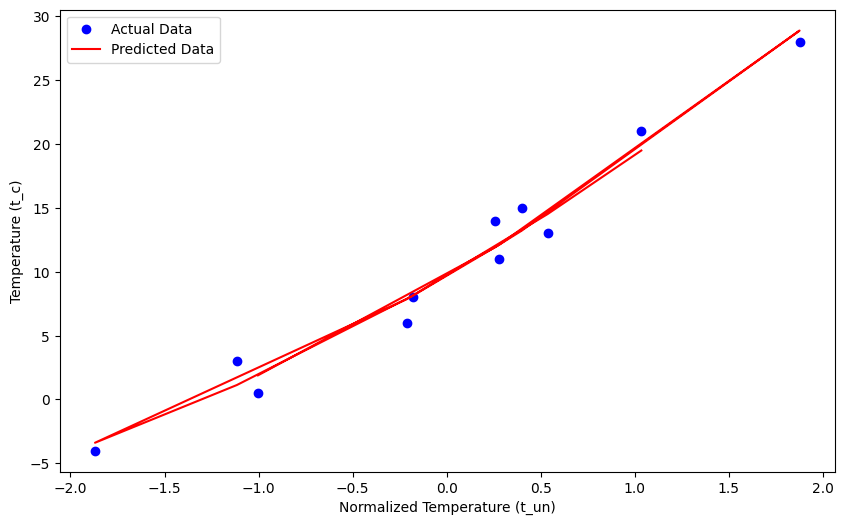

In [32]:
import matplotlib.pyplot as plt

# Generate predicted temperatures using the trained model
t_p = model(t_u, *final_params).detach().numpy()

# Plot the input data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(t_un, t_c, label='Actual Data', color='blue')
plt.plot(t_un, t_p, label='Predicted Data', color='red')
plt.xlabel('Normalized Temperature (t_un)')
plt.ylabel('Temperature (t_c)')
plt.legend()
plt.show()

1.c Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?

In [28]:

t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
import numpy as np

t_u = np.array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

mean_t_u = np.mean(t_u)
std_dev_t_u = np.std(t_u)

t_un = (t_u - mean_t_u) / std_dev_t_u
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = torch.tensor(t_un)

def model_linear(t_u, w, b):
   return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()


def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1,n_epochs + 1):
        t_p = model_linear(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

params = [w, b]
optimizer = optim.Adam(params, lr=1e-1)
final_params_linear = training_loop(n_epochs=5000, optimizer=optimizer, params=params, t_u=t_u, t_c=t_c)
print(f'Learning Rate: {lr}, Final Parameters: {[param.item() for param in final_params]}')


Epoch 500, Loss 7.612902
Epoch 1000, Loss 3.086699
Epoch 1500, Loss 2.928580
Epoch 2000, Loss 2.927646
Epoch 2500, Loss 2.927646
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927646
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927646
Learning Rate: 0.0001, Final Parameters: [0.003405186580494046, 0.18383310735225677, -9.011731147766113]


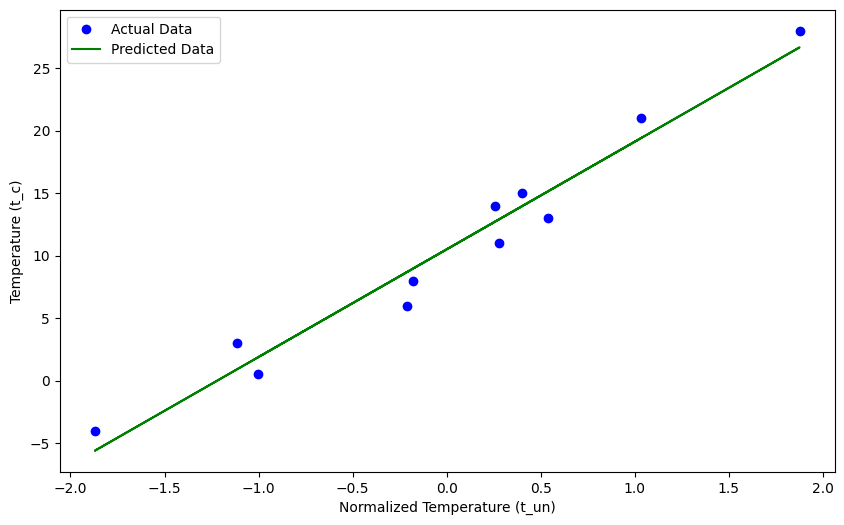

In [29]:
import matplotlib.pyplot as plt

# Generate predicted temperatures using the trained model
t_p = model_linear(t_u, *final_params_linear).detach().numpy()

# Plot the input data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(t_un, t_c, label='Actual Data', color='blue')
plt.plot(t_un, t_p, label='Predicted Data', color='green')
plt.xlabel('Normalized Temperature (t_un)')
plt.ylabel('Temperature (t_c)')
plt.legend()
plt.show()

**Linear**

**Lectur result using SGD**

Epoch 5000, Loss 2.927648

**Lectur result using ADAM**

Epoch 2000, Loss 2.927646

**Non-Linear **

**non -linear best **

After comparing with the lecture result ADAM performs best with min loss.

Epoch 5000, Loss 2.132423
Learning Rate: 0.0001,

After visualization Results from model with ADAM optimizer is better than our baseline linear model




